In [ ]:
import os, sys, subprocess

REPO = "https://github.com/jongmoonha/Signal_Processing_Practice.git"
DIR  = "Signal_Processing_Practice"

try:
    import google.colab  # Colab 전용 모듈
    if not os.path.isdir(DIR):
        subprocess.run(["git","clone",REPO], check=True)
    print('We are in Google Colab environment.')
    os.chdir('/content/'+DIR)
    print('Current working directory:', os.getcwd())

except ImportError:
    print('We are in a local environment, not Google Colab.')
    pass

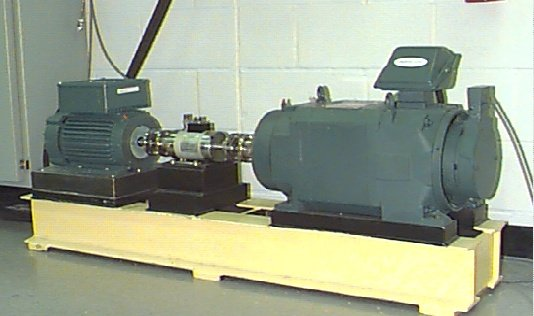

**CWRU dataset :** Smith, W. A., & Randall, R. B. (2015). Rolling element bearing diagnostics using the Case Western Reserve University data: A benchmark study. Mechanical systems and signal processing, 64, 100-131.

# Feature Practice - CWRU

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import hilbert
import utils
plt.rc('font', size=20)

# 데이터 로드

## 베어링 주파수 DB 만들기

In [3]:
rpm = 1772
F_shaft = rpm/60
print('Shaft Frequency is', F_shaft)

DE_BPFI, DE_BPFO = 5.4152*F_shaft, 3.5848*F_shaft
print('DE Inner Race Fault Frequency: ', DE_BPFI)
print('DE Outer Race Fault Frequency: ', DE_BPFO)

FE_BPFI, FE_BPFO = 4.9469*F_shaft, 3.0530*F_shaft
print('FE Inner Race Fault Frequency: ', FE_BPFI)
print('FE Outer Race Fault Frequency: ', FE_BPFO)

Shaft Frequency is 29.533333333333335
DE Inner Race Fault Frequency:  159.92890666666668
DE Outer Race Fault Frequency:  105.87109333333333
FE Inner Race Fault Frequency:  146.0984466666667
FE Outer Race Fault Frequency:  90.16526666666667


## 신호 로드하고 그려보기

In [4]:
fs=12000

### 신호를 로드해 주세요.
정상 데이터를 v_n, 결함 데이터를 v_f로 지정해 주세요

In [5]:
data = np.array(pd.read_csv('./data/data_normal.csv'))
v_n = data[:,1]

data = np.array(pd.read_csv('./data/data_fault_DE_IR.csv'))
v_f = data[:,1]






### 정상, 고장 신호를 한 그래프에 그려주세요

(-1.0, 1.0)

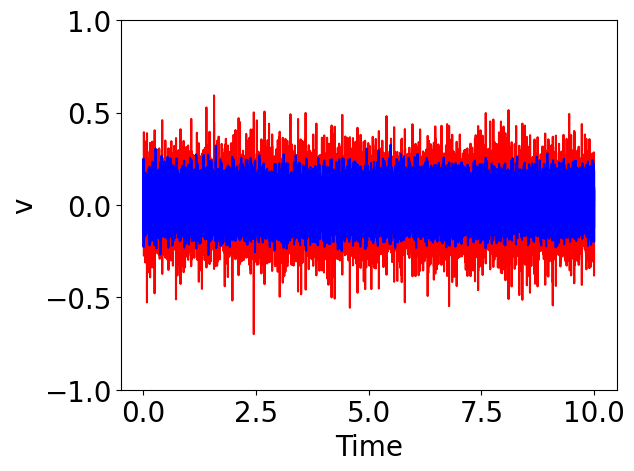

In [6]:
T_n = len(v_n)/fs               # 전체 샘플수 / 1초당 샘플수 = 총 시간
t_n=np.arange(1/fs, T_n, 1/fs)  # 1/fs초 부터 T초까지 1/fs초 간격
T_f = len(v_f)/fs
t_f = np.arange(1/fs, T_f, 1/fs)

plt.figure()
plt.plot(t_f,v_f,'r')
plt.plot(t_n,v_n,'b')
plt.xlabel('Time')
plt.ylabel('v')
plt.ylim([-1,1])





## 주파수 분석해보기

### 정상, 고장 신호에 대해 주파수 분석을 한 후 한 그래프에 그려주세요

(0.0, 0.06)

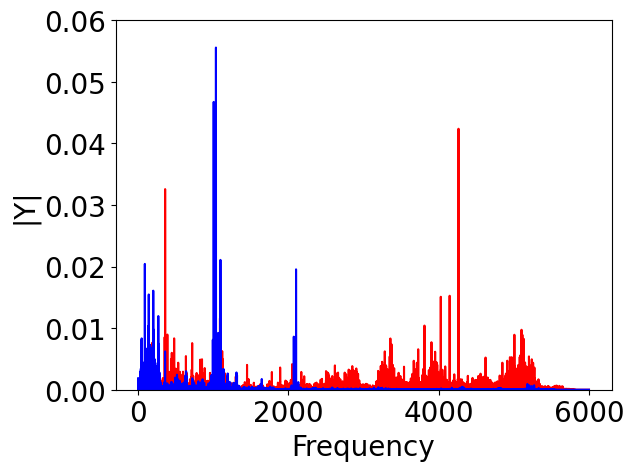

In [7]:
f_n, A_n = utils.fft_simple(v_n,fs)
f_f, A_f = utils.fft_simple(v_f,fs)

plt.figure()
plt.plot(f_f,A_f,'r')
plt.plot(f_n,A_n,'b')
plt.xlabel('Frequency')
plt.ylabel('|Y|')
plt.ylim([0,0.06])




### 정상, 고장 신호에 대해 필터링을 수행해 주세요.

In [8]:
ftype='band'
Wn=np.array([4500,5900])
print(Wn)

[4500 5900]


정상신호에 대한 결과는 v_filter_n, 결함신호에 대한 결과는 v_filter_f 라는 변수로 지정해 주세요.

In [9]:
v_filter_n = utils.filtering(v_n, fs, Wn, ftype)
v_filter_f = utils.filtering(v_f, fs, Wn, ftype)






### 정상, 고장 신호에 대해 주파수 분석을 한 후 한 그래프에 그려주세요

(-1.0, 1.0)

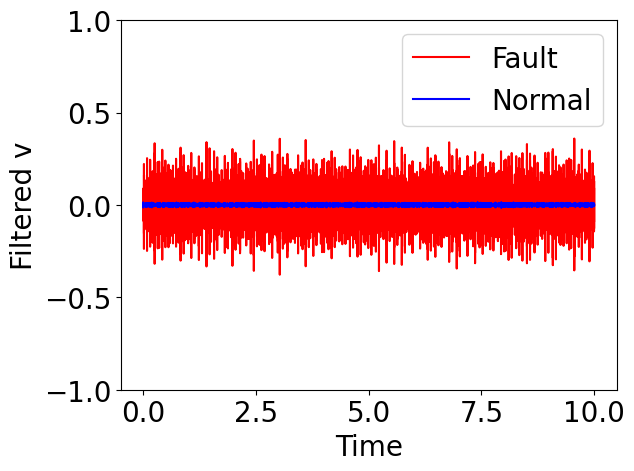

In [10]:
plt.figure()
plt.plot(t_f,v_filter_f,'r')
plt.plot(t_n,v_filter_n,'b')
plt.xlabel('Time')
plt.ylabel('Filtered v')
plt.legend(['Fault','Normal'])
plt.ylim([-1,1])

## 필터링 포락선 분석해보기

### 정상, 고장 신호의 필터링 결과에 대해 포락선 분석을 수행해 주세요.
정상신호에 대한 결과는 v_filter_env_n, 결함신호에 대한 결과는 v_filter_env_f 라는 변수로 지정해 주세요.

In [11]:
v_filter_env_n = abs(hilbert(v_filter_n,axis=0));
v_filter_env_f = abs(hilbert(v_filter_f,axis=0));






In [12]:
[f_filter_env_n, A_filter_env_n] = utils.fft_simple(v_filter_env_n-np.mean(v_filter_env_n),fs);
[f_filter_env_f, A_filter_env_f] = utils.fft_simple(v_filter_env_f-np.mean(v_filter_env_f),fs);

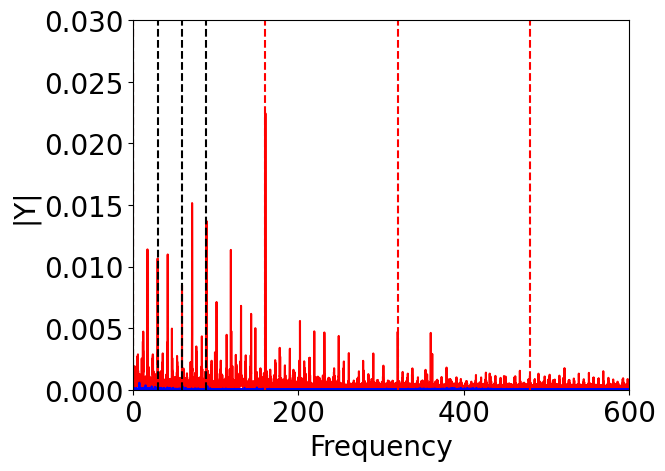

In [13]:
plt.figure()
plt.plot(f_filter_env_f,A_filter_env_f,'r')
plt.plot(f_filter_env_n,A_filter_env_n,'b')
plt.xlabel('Frequency')
plt.ylabel('|Y|')
plt.axis([0,600,0,0.03])

for n in range(4):
    plt.axvline(n*F_shaft, color='k', linestyle='dashed')
    plt.axvline(n*DE_BPFI, color='r', linestyle='dashed')

# Feature 추출

In [14]:
band_energy_and_filter = [4500,5900]
band_enrgy_from_envelope = np.matrix([
                [DE_BPFI*0.9, DE_BPFI*1.1],
                [2*DE_BPFI*0.9, 2*DE_BPFI*1.1],
                [3*DE_BPFI*0.9, 3*DE_BPFI*1.1]
                ])

print(f'Band Energy and Filter Range: {band_energy_and_filter}')
print(f'Band Energy from Envelope: {band_enrgy_from_envelope}')

Band Energy and Filter Range: [4500, 5900]
Band Energy from Envelope: [[143.936016   175.92179733]
 [287.872032   351.84359467]
 [431.808048   527.765392  ]]


In [19]:
feature_name

array(['RMS', 'Skew', 'Kurt', 'CF', 'Band1', 'RMS_filter', 'Skew_filter',
       'Kurt_filter', 'CF_filter', 'Band1_env', 'Band2_env', 'Band3_env'],
      dtype='<U11')

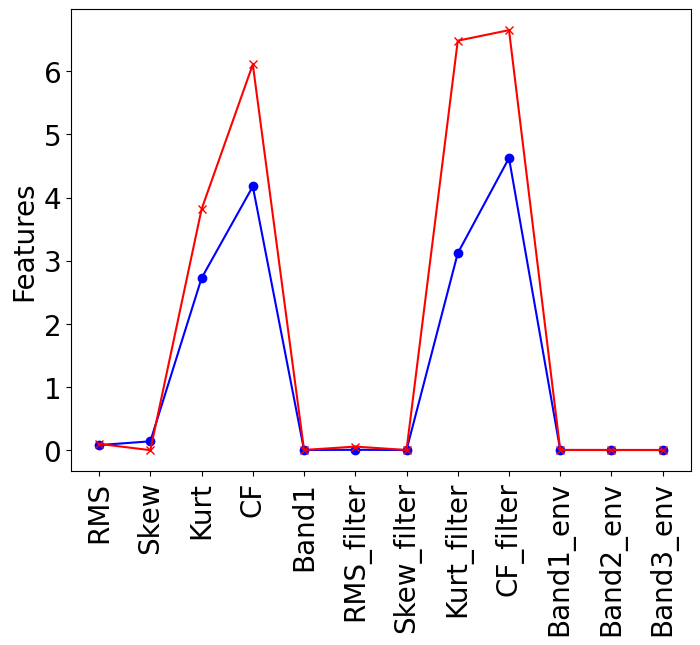

In [20]:
feature_n, feature_name = utils.feature(v_n, fs, band_energy_and_filter, band_enrgy_from_envelope)
feature_f, feature_name = utils.feature(v_f, fs, band_energy_and_filter, band_enrgy_from_envelope)

plt.figure(figsize=(8,6))
plt.plot(feature_n,'-bo')
plt.plot(feature_f,'-rx')
plt.xticks(np.arange(0,np.size(feature_name)),feature_name,rotation='vertical')
plt.ylabel('Features')
plt.show()

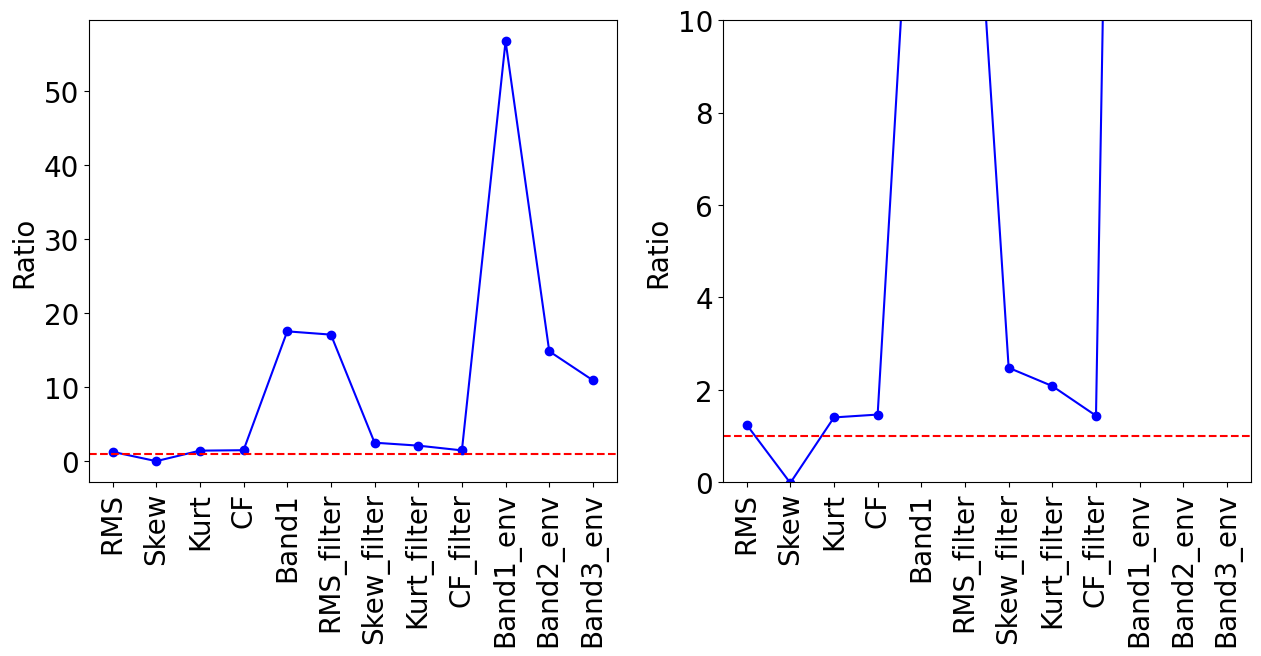

In [21]:
feature_ratio = feature_f/feature_n

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(feature_ratio,'-bo')
plt.xticks(np.arange(0,np.size(feature_name)),feature_name,rotation='vertical')
plt.axhline(y=1, color='r', linestyle='--')
plt.ylabel('Ratio')

plt.subplot(1,2,2)
plt.plot(feature_ratio,'-bo')
plt.xticks(np.arange(0,np.size(feature_name)),feature_name,rotation='vertical')
plt.axhline(y=1, color='r', linestyle='--')
plt.ylim([0,10])
plt.ylabel('Ratio')
plt.show()